In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/alanp/Documents/RealEstate/Cleaning/RealEstateDataClean.csv')
columns = df.columns
df.drop(columns[0], inplace=True, axis = 1)
df

,baths,baths_3qtr,baths_full,baths_half,beds,city,garage,list_price,lot_sqft,name,sold_date,sold_price,sqft,stories,sub_type,type,year_built
0,1.0,0.0,1.0,0.0,3.0,Los Angeles,2.0,745000.0,7018.0,0,2021-09-01,760000.0,1031.0,1.0,0,single_family,1949.0
1,2.0,0.0,2.0,0.0,2.0,Los Angeles,0.0,699000.0,12776.0,0,2021-09-01,695000.0,1396.0,4.0,condo,condos,1982.0
2,3.0,2.0,1.0,0.0,3.0,Los Angeles,0.0,1200000.0,6351.0,0,2021-09-01,1385000.0,1881.0,1.0,0,single_family,1953.0
3,2.0,0.0,2.0,0.0,3.0,Los Angeles,0.0,675000.0,2153275.0,0,2021-09-01,675000.0,1688.0,1.0,0,mobile,2015.0
4,3.0,0.0,3.0,0.0,5.0,Los Angeles,2.0,795000.0,7742.0,0,2021-09-01,870000.0,2098.0,1.0,0,single_family,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,3.0,0.0,2.0,1.0,3.0,Anaheim,2.0,645000.0,0.0,0,2021-08-10,645000.0,1250.0,2.0,condo,condos,1999.0
1914,3.0,0.0,2.0,1.0,5.0,Anaheim,2.0,1000000.0,7200.0,0,2021-08-10,1200000.0,2771.0,2.0,0,single_family,1975.0
1915,4.0,0.0,4.0,0.0,3.0,Anaheim,2.0,849999.0,5244.0,0,2021-08-09,835000.0,2139.0,2.0,0,single_family,1977.0
1916,3.0,0.0,2.0,1.0,3.0,Anaheim,2.0,590000.0,0.0,0,2021-08-09,660000.0,1555.0,2.0,townhouse,townhomes,1996.0


In [3]:
print(df['year_built'].describe())
df[df['year_built'] == 0]
df = df[df['year_built'] != 0]
df['year_built'].describe()

count    1918.000000
mean     1781.706986
std       575.993630
min         0.000000
25%      1937.000000
50%      1965.000000
75%      1987.000000
max      2021.000000
Name: year_built, dtype: float64


count    1737.000000
mean     1967.365573
std        29.850230
min      1865.000000
25%      1949.000000
50%      1970.000000
75%      1989.000000
max      2021.000000
Name: year_built, dtype: float64

In [4]:
bins = [1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
df['decade'] = pd.cut(df['year_built'], bins)

df['decade'].value_counts()

<ipython-input-4-b6336d6a30ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = pd.cut(df['year_built'], bins)


(1970, 1980]    247
(1950, 1960]    236
(1980, 1990]    207
(2000, 2010]    176
(1960, 1970]    175
(1920, 1930]    147
(1990, 2000]    137
(1940, 1950]    125
(2010, 2020]     83
(1930, 1940]     65
(1900, 1910]     50
(1910, 1920]     44
(1890, 1900]     20
(2020, 2030]     18
(1880, 1890]      5
(1870, 1880]      1
(1860, 1870]      1
Name: decade, dtype: int64

<ipython-input-5-68426824e8a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = df["decade"].astype(str)


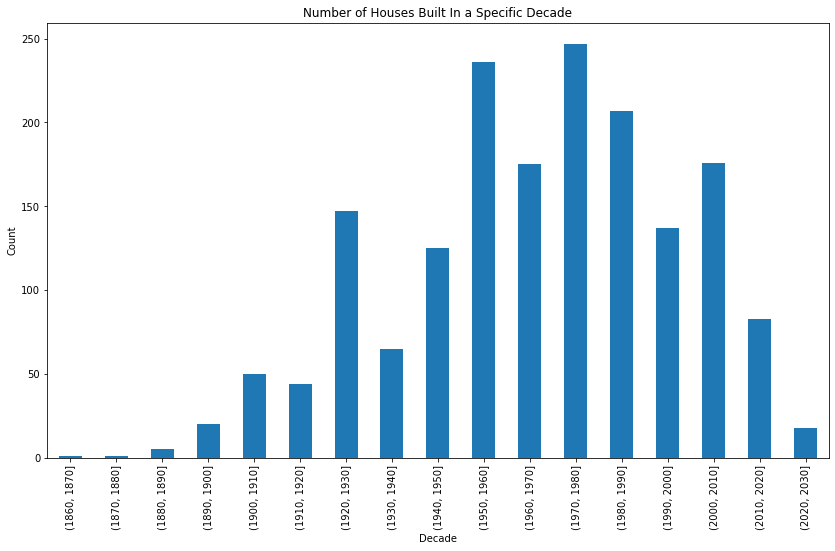

In [5]:
df['decade'] = df["decade"].astype(str)

ax = df['decade'].value_counts().sort_index(ascending=True).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Houses Built in a Specific Decade")
_ = plt.xlabel('Decade')
_ = plt.ylabel('Count')
_ = plt.title('Number of Houses Built In a Specific Decade')
_ = plt.xticks(rotation=90)

plt.show()

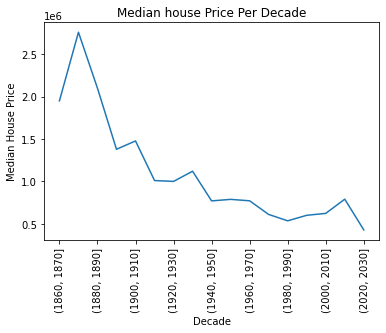

In [6]:
ax = df.groupby('decade')['sold_price'].median().plot(kind='line',
                                                     title = 'Median house Price Per Decade')
_ = plt.xlabel('Decade')
_ = plt.ylabel('Median House Price')
_ = plt.xticks(rotation=90)
plt.show()

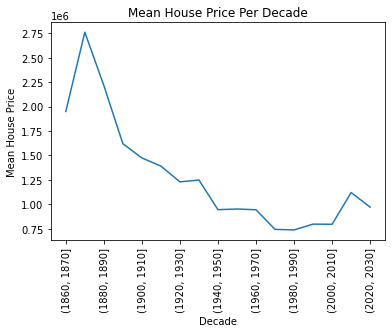

In [7]:
ax = df.groupby('decade')['sold_price'].mean().plot(kind='line',
                                                     title = 'Mean House Price Per Decade')
_ = plt.xlabel('Decade')
_ = plt.ylabel('Mean House Price')
_ = plt.xticks(rotation=90)
plt.show()

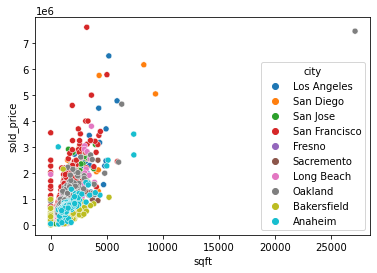

In [8]:
sns.scatterplot(data=df, x='sqft', y='sold_price', hue='city')
plt.show()

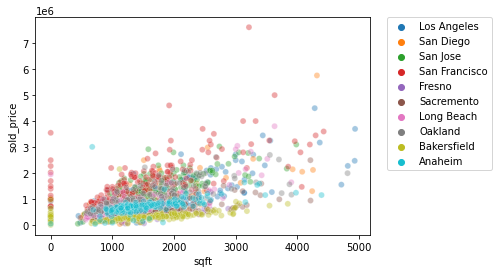

In [9]:
df_less5000 = df[df['sqft'] < 5000]
_ = sns.scatterplot(data=df_less5000, x='sqft', y='sold_price', hue='city', alpha = .4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


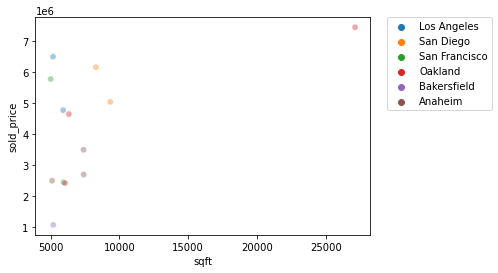

In [10]:
df_greater5000 = df[df['sqft'] > 5000]
_ = sns.scatterplot(data=df_greater5000, x='sqft', y='sold_price', hue='city', alpha = .4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


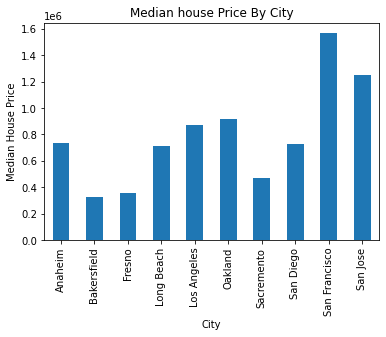

In [11]:
ax = df.groupby('city')['sold_price'].median().plot(kind='bar',
                                                     title = 'Median house Price By City')
_ = plt.xlabel('City')
_ = plt.ylabel('Median House Price')
_ = plt.xticks(rotation=90)
plt.show()

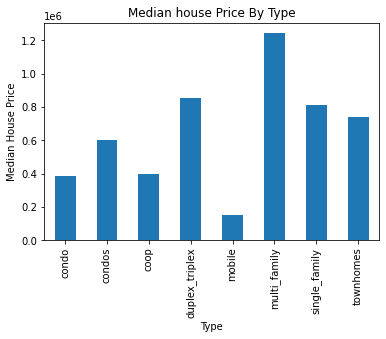

In [12]:
ax = df.groupby('type')['sold_price'].median().plot(kind='bar',
                                                     title = 'Median house Price By Type')
_ = plt.xlabel('Type')
_ = plt.ylabel('Median House Price')
_ = plt.xticks(rotation=90)
plt.show()

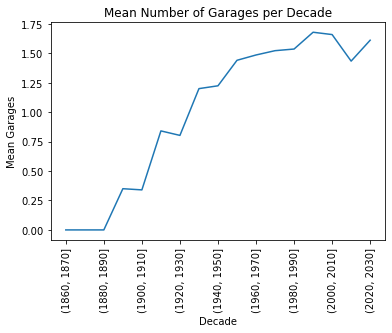

In [13]:
ax = df.groupby('decade')['garage'].mean().plot(kind='line',
                                                     title = 'Mean Number of Garages per Decade')
_ = plt.xlabel('Decade')
_ = plt.ylabel('Mean Garages')
_ = plt.xticks(rotation=90)
plt.show()

In [14]:
df
subset = df[['baths','baths_3qtr','baths_full','baths_half','beds','garage','list_price','lot_sqft','sold_price','sqft','stories', 'year_built']]

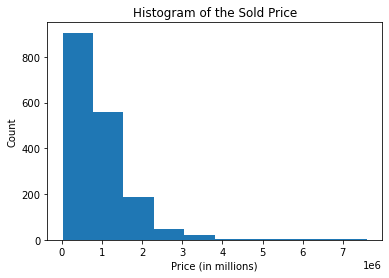

In [15]:
fig, ax = plt.subplots()
_ = ax.hist(df['sold_price'])
_ = plt.xlabel('Price (in millions)')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of the Sold Price')
plt.show()

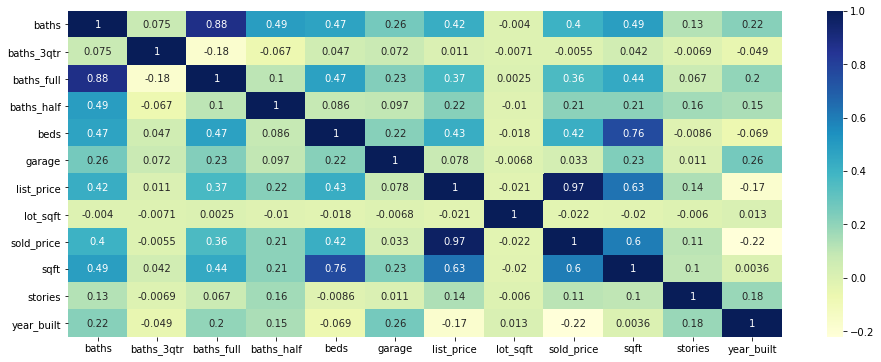

In [16]:
plt.figure(figsize=(16, 6))
_ = sns.heatmap(subset.corr(), annot=True, cmap='YlGnBu')
plt.show()